<a href="https://colab.research.google.com/github/MohammadMaftoun/Breast-Cancer-Prediction-using-SMOTE-kfold-Cross-Validation-SVM-Optimized-by-Metaheuristic-Algorithm/blob/main/BC_Prediction_using_Metaheuristic_Algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn import datasets,metrics
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [2]:
!pip install mealpy

In [3]:
from sklearn.model_selection import StratifiedKFold
from mealpy import FloatVar, StringVar, SMA, Problem

In [4]:
dt = datasets.load_breast_cancer()
X = dt.data
y = dt.target

In [5]:
print(X)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]


In [6]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

In [7]:
!pip install smote-variants

In [8]:
import smote_variants as sv
oversampler= sv.distance_SMOTE()


X, y = oversampler.sample(X, y)

2023-11-07 10:26:58,513:INFO:distance_SMOTE: Running sampling via ('distance_SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'nn_params': {}, 'n_jobs': 1, 'ss_params': {'n_dim': 2, 'simplex_sampling': 'random', 'within_simplex_sampling': 'random', 'gaussian_component': {}}, 'random_state': None, 'class_name': 'distance_SMOTE'}")
INFO:smote_variants:distance_SMOTE: Running sampling via ('distance_SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'nn_params': {}, 'n_jobs': 1, 'ss_params': {'n_dim': 2, 'simplex_sampling': 'random', 'within_simplex_sampling': 'random', 'gaussian_component': {}}, 'random_state': None, 'class_name': 'distance_SMOTE'}")
2023-11-07 10:26:58,518:INFO:NearestNeighborsWithMetricTensor: NN fitting with metric minkowski
INFO:smote_variants:NearestNeighborsWithMetricTensor: NN fitting with metric minkowski
2023-11-07 10:26:58,523:INFO:NearestNeighborsWithMetricTensor: kneighbors query minkowski
INFO:smote_variants:NearestNeighborsWithMetricTensor: kneighbors query minko

In [9]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

scaler = MinMaxScaler()
print(scaler.fit(X))

MinMaxScaler()


In [10]:
X = scaler.transform(X)
X

array([[0.52103744, 0.0226581 , 0.54598853, ..., 0.91202749, 0.59846245,
        0.41886396],
       [0.64314449, 0.27257355, 0.61578329, ..., 0.63917526, 0.23358959,
        0.22287813],
       [0.60149557, 0.3902604 , 0.59574321, ..., 0.83505155, 0.40370589,
        0.21343303],
       ...,
       [0.39474261, 0.4419351 , 0.40244438, ..., 0.62456728, 0.35082698,
        0.30905741],
       [0.67258214, 0.38449193, 0.66058918, ..., 0.74856446, 0.20518127,
        0.15267921],
       [0.64011218, 0.50374415, 0.63882422, ..., 0.68675524, 0.27655427,
        0.20914746]])

In [11]:
import pandas  as pd
data = pd.DataFrame(X)
data['y'] = y
data = np.concatenate((X, np.vstack(y)), axis = 1)
data = pd.DataFrame(data)

In [12]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864,0.0
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878,0.0
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433,0.0
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711,0.0
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595,0.0


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       714 non-null    float64
 1   1       714 non-null    float64
 2   2       714 non-null    float64
 3   3       714 non-null    float64
 4   4       714 non-null    float64
 5   5       714 non-null    float64
 6   6       714 non-null    float64
 7   7       714 non-null    float64
 8   8       714 non-null    float64
 9   9       714 non-null    float64
 10  10      714 non-null    float64
 11  11      714 non-null    float64
 12  12      714 non-null    float64
 13  13      714 non-null    float64
 14  14      714 non-null    float64
 15  15      714 non-null    float64
 16  16      714 non-null    float64
 17  17      714 non-null    float64
 18  18      714 non-null    float64
 19  19      714 non-null    float64
 20  20      714 non-null    float64
 21  21      714 non-null    float64
 22  22

In [14]:
data[30].value_counts()

0.0    357
1.0    357
Name: 30, dtype: int64

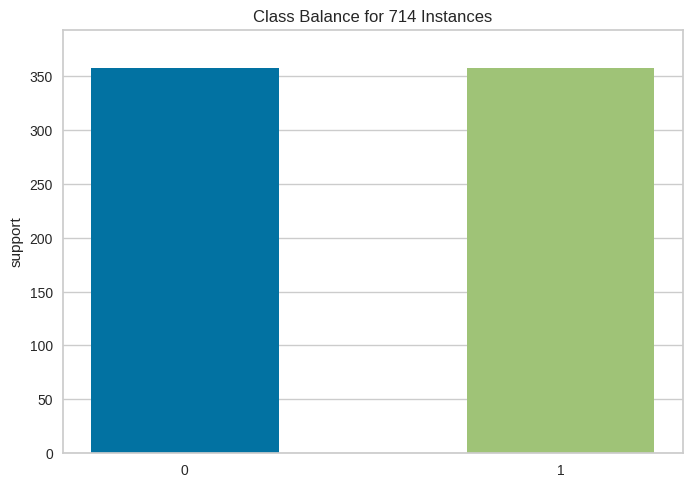

ClassBalance(ax=<Axes: title={'center': 'Class Balance for 714 Instances'}, ylabel='support'>)

In [15]:
from yellowbrick.target import class_balance

class_balance(y)

In [16]:
X = data.drop([30] ,axis =1)
# X.astype(int)
y = data[30]
# y.astype(int)
print(X.shape)
print(y.shape)

(714, 30)
(714,)


In [17]:
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

for train_ix, test_ix in kfold.split(X, y):
	x_train, x_test = X.iloc[train_ix], X.iloc[test_ix]
	y_train, y_test = y.iloc[train_ix], y.iloc[test_ix]

In [18]:
class SvmOptimizedProblem(Problem):
    def __init__(self, bounds=None, minmax="max", data=None, **kwargs):
        self.data = data
        super().__init__(bounds, minmax, **kwargs)

    def obj_func(self, x):
        x_decoded = self.decode_solution(x)
        C_paras, kernel_paras = x_decoded["C_paras"], x_decoded["kernel_paras"]

        svc = SVC(C=C_paras, kernel=kernel_paras, random_state=1)
        # Fit the model
        svc.fit(x_train, y_train)
        # Make the predictions
        y_predict = svc.predict(x_test)
        # Measure the performance
        return metrics.accuracy_score(y_test, y_predict)


data = [x_train, x_test, y_train, y_test]
my_bounds = [
    FloatVar(lb=0.01, ub=1000., name="C_paras"),
    StringVar(valid_sets=('linear', 'poly', 'rbf', 'sigmoid'), name="kernel_paras")
]
problem = SvmOptimizedProblem(bounds=my_bounds, minmax="max", data=data)

model = SMA.OriginalSMA(epoch=50, pop_size=50)
model.solve(problem)

print(f"Best agent: {model.g_best}")
print(f"Best solution: {model.g_best.solution}")
print(f"Best accuracy: {model.g_best.target.fitness}")
print(f"Best parameters: {model.problem.decode_solution(model.g_best.solution)}")

INFO:mealpy.bio_based.SMA.OriginalSMA:Solving single objective optimization problem.
INFO:mealpy.bio_based.SMA.OriginalSMA:>>>Problem: P, Epoch: 1, Current best: 1.0, Global best: 1.0, Runtime: 0.77212 seconds
INFO:mealpy.bio_based.SMA.OriginalSMA:>>>Problem: P, Epoch: 2, Current best: 1.0, Global best: 1.0, Runtime: 0.76061 seconds
INFO:mealpy.bio_based.SMA.OriginalSMA:>>>Problem: P, Epoch: 3, Current best: 1.0, Global best: 1.0, Runtime: 0.82130 seconds
INFO:mealpy.bio_based.SMA.OriginalSMA:>>>Problem: P, Epoch: 4, Current best: 0.9859154929577465, Global best: 1.0, Runtime: 0.88478 seconds
INFO:mealpy.bio_based.SMA.OriginalSMA:>>>Problem: P, Epoch: 5, Current best: 1.0, Global best: 1.0, Runtime: 0.88096 seconds
INFO:mealpy.bio_based.SMA.OriginalSMA:>>>Problem: P, Epoch: 6, Current best: 1.0, Global best: 1.0, Runtime: 1.23793 seconds
INFO:mealpy.bio_based.SMA.OriginalSMA:>>>Problem: P, Epoch: 7, Current best: 1.0, Global best: 1.0, Runtime: 1.65118 seconds
INFO:mealpy.bio_based.SMA

Best agent: id: 2656, target: Objectives: [1.], Fitness: 1.0, solution: [0.15022638 0.        ]
Best solution: [0.15022638 0.        ]
Best accuracy: 1.0
Best parameters: {'C_paras': 0.1502263849718202, 'kernel_paras': 'linear'}


In [19]:
!pip install tpot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.4/87.4 kB 819.9 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 8.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11939 sha256=6cded4dfeecca65225d4df6789e0b312116b986626673232721cc1262caa7e18
  Stored in directory: /root/.cache/pip/wheels/af/f9/87/bf5b3d565c2a007b4dae9d8142dccc85a9f164e517062dd519
Successfully built stopit


In [20]:
from tpot import TPOTClassifier

In [21]:
tpot = TPOTClassifier(verbosity=2, max_time_mins=10)
tpot.fit(x_train, y_train)
print(tpot.score(x_test, y_test))

Optimization Progress:   0%|          | 0/100 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9844718992248062

Generation 2 - Current best internal CV score: 0.9860343992248062

Generation 3 - Current best internal CV score: 0.9860343992248062

Generation 4 - Current best internal CV score: 0.9891230620155038

10.06 minutes have elapsed. TPOT will close down.
TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: LinearSVC(StandardScaler(input_matrix), C=1.0, dual=True, loss=hinge, penalty=l2, tol=1e-05)
0.9577464788732394
